In [1]:
from py21cmmc_wv import morlet
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
bw = 50.0
numin = 130.0
N = 736
nu = np.arange(N) * bw/N + numin
mid = (nu[0] + nu[-1])/2

spectrum = np.exp(-(nu-mid)**2/ (2*4.0**2))
#spectrum = np.repeat(spectrum, 100).reshape((len(spectrum), 100)).T

In [12]:
%timeit morlet.morlet_transform_c(spectrum, nu, convergence_extent=10)
%timeit morlet.morlet_transform(spectrum, nu)

812 ms ± 5.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
13.8 s ± 139 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
trns, f, _ = morlet.morlet_transform(spectrum, nu)
trns = np.abs(trns)**2

In [9]:
trnsc, f, _ = morlet.morlet_transform_c(spectrum, nu, convergence_extent=10)
trnsc = np.abs(trnsc)**2

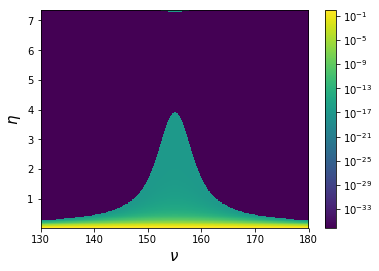

In [10]:
plt.imshow(trnsc.T, origin='lower', extent=(nu.min(), nu.max(), f.min(), f.max()), aspect='auto', norm=LogNorm())
# plt.yscale('log')

plt.xlabel(r"$\nu$", fontsize=15)
plt.ylabel(r"$\eta$", fontsize=15)
plt.colorbar()

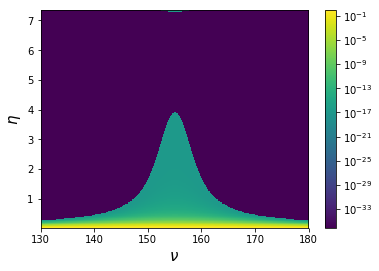

In [9]:
plt.imshow(trns.T, origin='lower', extent=(nu.min(), nu.max(), f.min(), f.max()), aspect='auto', norm=LogNorm())
# plt.yscale('log')

plt.xlabel(r"$\nu$", fontsize=15)
plt.ylabel(r"$\eta$", fontsize=15)
plt.colorbar()

## Check out PyWavelets

In [25]:
wv = pywt.ContinuousWavelet("cmor")

In [30]:
trns.shape

(736, 367)

In [44]:
scales = np.arange(1,len(f))

In [45]:
ans = pywt.cwt(spectrum, scales, wv)

In [41]:
ans[0].shape

(735, 736)

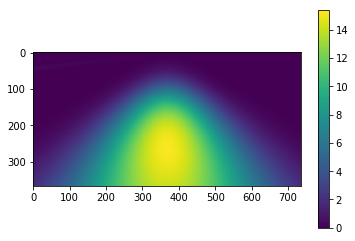

In [49]:
plt.imshow(np.abs(ans[0])**2)
plt.colorbar()

In [43]:
ans[1]

array([0.5       , 0.25      , 0.16666667, 0.125     , 0.1       ,
       0.08333333, 0.07142857, 0.0625    , 0.05555556, 0.05      ,
       0.04545455, 0.04166667, 0.03846154, 0.03571429, 0.03333333,
       0.03125   , 0.02941176, 0.02777778, 0.02631579, 0.025     ,
       0.02380952, 0.02272727, 0.02173913, 0.02083333, 0.02      ,
       0.01923077, 0.01851852, 0.01785714, 0.01724138, 0.01666667,
       0.01612903, 0.015625  , 0.01515152, 0.01470588, 0.01428571,
       0.01388889, 0.01351351, 0.01315789, 0.01282051, 0.0125    ,
       0.01219512, 0.01190476, 0.01162791, 0.01136364, 0.01111111,
       0.01086957, 0.0106383 , 0.01041667, 0.01020408, 0.01      ,
       0.00980392, 0.00961538, 0.00943396, 0.00925926, 0.00909091,
       0.00892857, 0.00877193, 0.00862069, 0.00847458, 0.00833333,
       0.00819672, 0.00806452, 0.00793651, 0.0078125 , 0.00769231,
       0.00757576, 0.00746269, 0.00735294, 0.00724638, 0.00714286,
       0.00704225, 0.00694444, 0.00684932, 0.00675676, 0.00666

In [6]:
%timeit morlet_transform(spectrum, nu)

14.4 s ± 323 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
%timeit pywt.cwt(spectrum, scales, wv)

27.5 s ± 333 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
